In [5]:
import numpy as np
import matplotlib.pyplot as plt

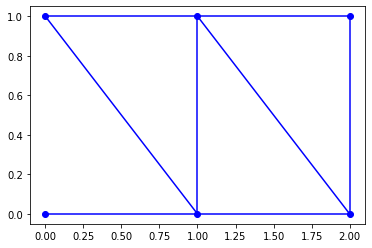

In [20]:
# --- Mesh definition ---

l1 = 1

n = []
for i in range(3):
    n.append(np.array([i*l1, 0]))
    n.append(np.array([i*l1, l1]))

nodes = np.array(n)

elems = np.array([
    [0, 2],
    [1, 2],
    [1, 3],
    [2, 3],
    [2, 4],
    [3, 4],
    [3, 5],
    [4, 5]
])


def plot(nodes, elems, c):
    plt.plot(nodes[:, 0], nodes[:, 1], 'o'+c)
    for elem in elems:
        pair = np.array([nodes[elem[0]], nodes[elem[1]]])
        plt.plot(pair[:, 0], pair[:, 1], '-'+c)

plot(nodes, elems, 'b')
plt.show()

In [16]:
# --- Element specific stiffness matrix formulation ---
# Method of weighted residuals (Galherkin) will generalise this

dof = 2 # Node dof

def rot(deg: int) -> np.ndarray:

    return np.array([
        [np.cos(deg), np.sin(deg), 0, 0],
        [0, 0, np.sin(deg), np.cos(deg)]
        ])

K_loc = np.array([
    [1, -1],
    [-1, 1]
])

print(np.round(K_loc@rot(45), 2))

[[ 0.53  0.85 -0.85 -0.53]
 [-0.53 -0.85  0.85  0.53]]


In [19]:
# --- System Assembly ---

A, E = 1, 1

gdof = dof*len(nodes)
K_glob = np.zeros((gdof, gdof))

for elem in elems:

    v = nodes[elem][0] - nodes[elem][1]

    if v[0] == 0:
        theta = 90
    elif v[1] == 0:
        theta = 0
    else:
        theta = np.arctan(v[0]/[1])[0]

    rot_elem = rot(theta)
    k_elem_glob = rot_elem.T@K_loc@rot_elem

    for a, i in enumerate(elem):
        for b, j in enumerate(elem):
            K_glob[2*i:2*(i+1), 2*j:2*(j+1)] += k_elem_glob[2*a:2*(a+1), 2*b:2*(b+1)]

    K_glob *= A*E

print(np.round((K_glob), 2))

[[ 1.   0.   0.   0.   0.  -1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.5 -0.5  0.5 -0.5  0.  -1.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.5 -0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5 -0.5  1.7 -0.9  0.4 -0.2  0.  -1.   0.   0. ]
 [-1.   0.  -0.5  0.5 -0.9  2.3 -0.8  0.4  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.4 -0.8  2.3 -0.9  0.5 -0.5  0.  -1. ]
 [ 0.   0.  -1.   0.  -0.2  0.4 -0.9  1.7 -0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5 -0.5  0.7 -0.9  0.4 -0.2]
 [ 0.   0.   0.   0.  -1.   0.  -0.5  0.5 -0.9  2.3 -0.8  0.4]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.4 -0.8  0.8 -0.4]
 [ 0.   0.   0.   0.   0.   0.  -1.   0.  -0.2  0.4 -0.4  1.2]]


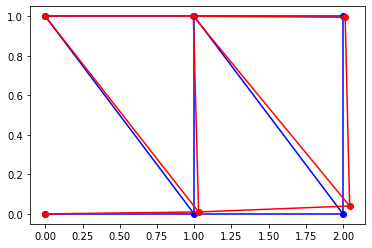

In [12]:
# --- Boundary Conditions + Solving ---

F = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01, 0, 0])
u = np.zeros_like(F)

# Omit rows + columns of constrained nodes and solve
u[dof*2:] = np.linalg.solve(K_glob[dof*2:, dof*2:], F[dof*2:])

u = u.reshape(-1, 2) # Reshape column vector into shape of nodes array

plot(nodes, elems, 'b')
plot(nodes + u, elems, 'r')
plt.show()